# EDA

In [1]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# loading in our working data 
df2 = pd.read_csv('../input/wine-reviews/winemag-data-130k-v2.csv')
print(df2.shape)
df2.head(3)

(129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [3]:
df2['description'][1000] # a view of a sample description

"Arcane's Cab is stylistically apart from either California or Washington. It defines its own space. There's plenty of new oak, but the fruit, acid and tannins stand up to it. This is sharp and tangy; cranberry and raspberry, strawberry and citric acids all playing their part. Still young, give it some time in a decanter or in your cellar to come together and show its best."

## Checking for repetition in descriptions

In [4]:
groups = df2.groupby('description')
count = groups.apply(lambda x: x.shape[0]) # groups by description to check for repeated descriptions
count.head(1)

description
"Chremisa," the ancient name of Krems, is commemorated in this wine that comes from Krems vineyards. It has tight, tangy apple-driven acidity, with a bright, light, citrusy character. Not for aging.    1
dtype: int64

In [5]:
print(count.min())
print(count.max())
count[count > 1].shape[0] # checks the number of description with rrepeatitions

1
3


10010

In [6]:
groups_dict = {k: v for k, v in groups} # making a dictionary of the groups

In [7]:
groups_dict[count[count > 1].index[0]] # a view of a sample repeated description

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
46540,46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
67614,67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge


In [8]:
groups_dict[count[count > 2].index[0]] # a view of a sample repeated description greayer than two

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
13143,13143,US,"Cigar box, café au lait, and dried tobacco aro...",Estate Grown,88,30.0,Washington,Red Mountain,Columbia Valley,Sean P. Sullivan,@wawinereport,Ambassador Vineyard 2013 Estate Grown Syrah (R...,Syrah,Ambassador Vineyard
25181,25181,US,"Cigar box, café au lait, and dried tobacco aro...",Estate Grown,88,30.0,Washington,Red Mountain,Columbia Valley,Sean P. Sullivan,@wawinereport,Ambassador Vineyard 2013 Estate Grown Syrah (R...,Syrah,Ambassador Vineyard
25182,25182,US,"Cigar box, café au lait, and dried tobacco aro...",Estate,88,30.0,Washington,Red Mountain,Columbia Valley,Sean P. Sullivan,@wawinereport,Ambassador Vineyard 2013 Estate Syrah (Red Mou...,Syrah,Ambassador Vineyard


## we clearly see some repeatitions. Let's check if any repeated ````description```` have different ````variety```` associated with it. We will call such varieties ````strange_varieties```` because they will tend to confuse our model.

In [9]:
strange_varieties = []
for i in count[count > 1].index:
    if len(groups_dict[i]['variety'].unique()) > 1:
        strange_varieties.append(i)

In [10]:
len(strange_varieties)

10

In [11]:
groups_dict[strange_varieties[0]] # let's see an example

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
33463,33463,Greece,"Aromas of citrus, melon and orange blossom sta...",NaN,88,15.0,Atalanti Valley,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Hatzimichalis 2015 Chardonnay (Atalanti Valley),Chardonnay,Hatzimichalis
124931,124931,Greece,"Aromas of citrus, melon and orange blossom sta...",NaN,89,22.0,Cephalonia,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Gentilini 2015 Robola (Cephalonia),Robola,Gentilini


## Checking for class imbalance

In [12]:
len(df2['variety'].unique()) # checking total classes in our data

708

In [13]:
variety_counts = df2['variety'].value_counts() # making a Series of the value counts of the classes
variety_counts

Pinot Noir                   13272
Chardonnay                   11753
Cabernet Sauvignon            9472
Red Blend                     8946
Bordeaux-style Red Blend      6915
                             ...  
Tsapournakos                     1
Xinisteri                        1
Folle Blanche                    1
Sauvignon Blanc-Assyrtiko        1
Shiraz-Roussanne                 1
Name: variety, Length: 707, dtype: int64

### we see that some classes have just one observation

In [14]:
variety_cumsum = variety_counts.cumsum() # making a Series of the cummulatiove sum of variety_counts
variety_cumsum

Pinot Noir                    13272
Chardonnay                    25025
Cabernet Sauvignon            34497
Red Blend                     43443
Bordeaux-style Red Blend      50358
                              ...  
Tsapournakos                 129966
Xinisteri                    129967
Folle Blanche                129968
Sauvignon Blanc-Assyrtiko    129969
Shiraz-Roussanne             129970
Name: variety, Length: 707, dtype: int64

In [15]:
variety_counts[variety_counts > 1000].shape[0] # let's see how many classes have more than 1000 observations

28

In [16]:
# let's key the classes (varieties) with numbers so we can properly plot their count. This will make the x-axis
# to be concise
variety_dict = {k: v for k, v in zip(range(len(df2['variety'].unique())), variety_counts.index)}

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

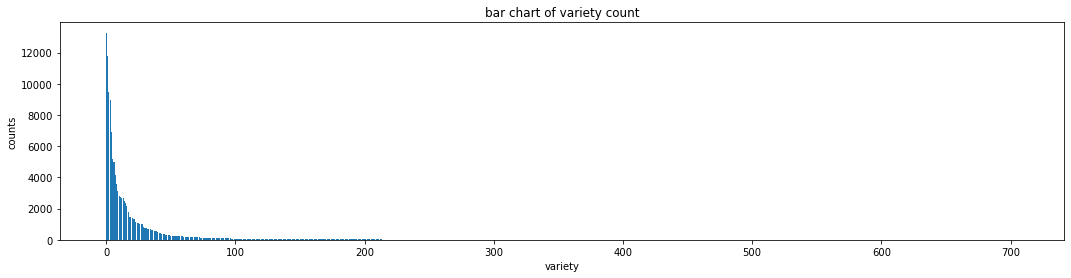

In [18]:
fig = plt.figure(figsize=(18, 4))
plt.bar(list(variety_dict.keys()), list(variety_counts.values))
plt.xlabel('variety')
plt.ylabel('counts')
plt.title('bar chart of variety count')
plt.show()

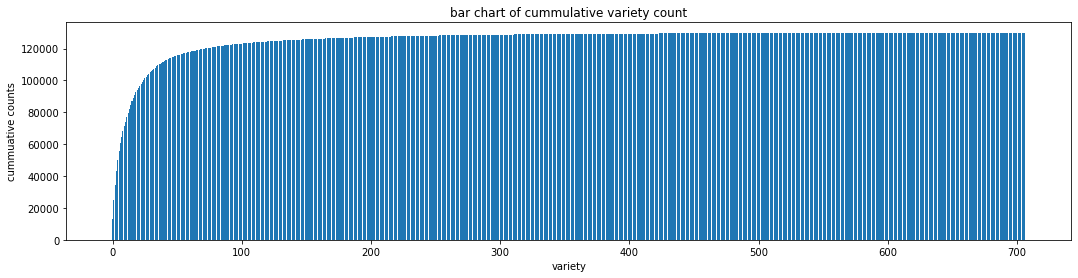

In [19]:
fig = plt.figure(figsize=(18, 4))
plt.bar(list(variety_dict.keys()), list(variety_cumsum.values))
plt.xlabel('variety')
plt.ylabel('cummuative counts')
plt.title('bar chart of cummulative variety count')
plt.show()

### from the chart above, most of the classes have just one observation. We obviously need to drop them.

In [20]:
variety_counts.describe()

count      707.000000
mean       183.833098
std        976.188990
min          1.000000
25%          2.000000
50%          6.000000
75%         28.500000
max      13272.000000
Name: variety, dtype: float64

### we see that half of the wine varieties have value counts less than 7

In [21]:
print('highest class (miniority to majority) ratio is 1:{}'.format(round(\
                                                    variety_counts.iloc[0] / variety_counts.iloc[-1], 3)))

highest class (miniority to majority) ratio is 1:13272.0


In [22]:
# creating a function to summary stats. for every top n varieties we will take as our working varieties
def summarize_n(n, get_results=False):
    largest_value = variety_cumsum.iloc[0]
    value = variety_counts.iloc[n-1]
    cum_value = variety_cumsum.iloc[n-1]
    
    if get_results:
        return round(largest_value / value, 3), round(cum_value / df2.shape[0], 3)
    
    print('If you take the first {} varieties with the highest value count, the smallest value count'.format(n) + 
    ' will be {}, the percentage of the data covered will be {}% and the highest class ratio will be 1:{}'.format(
    value, round(100*cum_value / df2.shape[0], 3), round(largest_value / value, 3)))

In [23]:
summarize_n(50)

If you take the first 50 varieties with the highest value count, the smallest value count will be 280, the percentage of the data covered will be 88.819% and the highest class ratio will be 1:47.4


In [24]:
summarize_n(100)

If you take the first 100 varieties with the highest value count, the smallest value count will be 80, the percentage of the data covered will be 94.717% and the highest class ratio will be 1:165.9


In [25]:
summarize_n(200)

If you take the first 200 varieties with the highest value count, the smallest value count will be 23, the percentage of the data covered will be 97.914% and the highest class ratio will be 1:577.043


### we need a balanced trade-off between percentage of dataset covered and highest class ratio. Let's see a plot of this trade-off

In [26]:
x = []
y = []
for i in range(len(variety_counts)):
    res = summarize_n(i+1, get_results=True)
    x.append(res[0])
    y.append(res[1]*100)

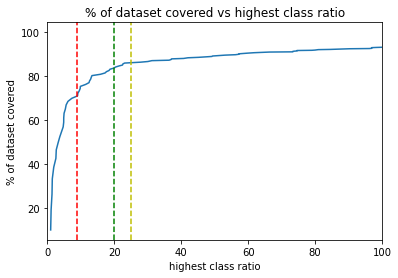

In [27]:
plt.plot(x, y)
plt.xlim((0, 100)) # show only the fist 100 class ratio because of the size of the possible highest class ratio
plt.ylabel('% of dataset covered')
plt.xlabel('highest class ratio')
plt.axvline(x=25, ls='--', color='y')
plt.axvline(x=20, ls='--', color='g')
plt.axvline(x=9, ls='--', color='r')
plt.title('% of dataset covered vs highest class ratio')
plt.show()

### The plot above is an elbow plot. A highest class ratio of about 1:9 seems to be the best. Let's see the number of top class corresponding to it.

In [28]:
variety_counts[variety_counts >= variety_cumsum.iloc[0] // 9].shape[0]

18

### we will aproximate this to the top 20 classes. These should be similar to the top 20 wine varieties. Let's check the summary of top 20

In [29]:
summarize_n(20)

If you take the first 20 varieties with the highest value count, the smallest value count will be 1455, the percentage of the data covered will be 72.258% and the highest class ratio will be 1:9.122


### Just so we have pretty more than enough classes to work with in case we want to fall down to top lower classes, we will save the top 40 varieties as a csv file. We will extract the top 20 from it and have a chance to increase the number if need be.

In [30]:
summarize_n(40)

If you take the first 40 varieties with the highest value count, the smallest value count will be 575, the percentage of the data covered will be 86.017% and the highest class ratio will be 1:23.082


In [31]:
top_varieties = variety_counts[(variety_counts.iloc[0] / variety_counts ) <=25]
print(top_varieties.shape[0])
top_varieties

40


Pinot Noir                       13272
Chardonnay                       11753
Cabernet Sauvignon                9472
Red Blend                         8946
Bordeaux-style Red Blend          6915
Riesling                          5189
Sauvignon Blanc                   4967
Syrah                             4142
Rosé                              3564
Merlot                            3102
Nebbiolo                          2804
Zinfandel                         2714
Sangiovese                        2707
Malbec                            2652
Portuguese Red                    2466
White Blend                       2360
Sparkling Blend                   2153
Tempranillo                       1810
Rhône-style Red Blend             1471
Pinot Gris                        1455
Champagne Blend                   1396
Cabernet Franc                    1353
Grüner Veltliner                  1345
Portuguese White                  1159
Bordeaux-style White Blend        1066
Pinot Grigio             

## Checking for Nan values

In [32]:
nan_df = df2.isnull().sum().to_frame()
nan_df.rename(columns={0: 'n_Nan'}, inplace=True)
nan_df['%missing'] = 100*nan_df['n_Nan'] / df2.shape[0]
nan_df

,n_Nan,%missing
Unnamed: 0,0,0.000000
country,63,0.048472
description,0,0.000000
designation,37465,28.825661
points,0,0.000000
price,8996,6.921544
province,63,0.048472
region_1,21247,16.347493
region_2,79460,61.136715
taster_name,26244,20.192197


## Now, we will check if the distribution of some features in the actual dataset is different from that in the top varieties. This will give us a clue on any feature that are affected or perculiar to either the top varieties or the bottom varieties. 

## By Country

In [33]:
len(df2['country'].dropna().unique()) # checks the number of unique countries

43

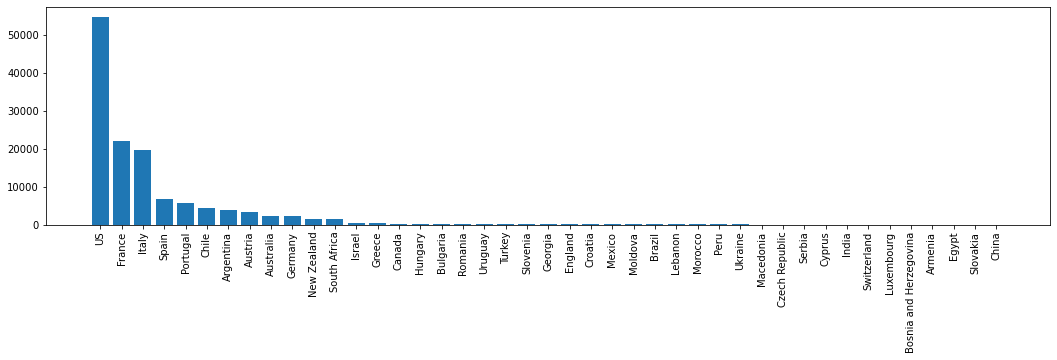

In [34]:
by_country = df2['country'].dropna().value_counts()
fig = plt.figure(figsize=(18, 4))
plt.bar(by_country.index, by_country.values)
plt.xticks(rotation=90)
plt.show()

In [35]:
by_country

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

In [36]:
countries_with_top_varieties = df2['country'].dropna()[df2['variety'].isin(top_varieties.index)].unique()
print(countries_with_top_varieties.shape)
countries_with_top_varieties

(41,)


array(['Italy', 'Portugal', 'US', 'France', 'Germany', 'Argentina',
       'Spain', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Romania', 'Greece', 'Mexico', 'Hungary',
       'Slovenia', 'Luxembourg', 'England', 'Uruguay', 'Lebanon',
       'Canada', 'Brazil', 'Morocco', 'Czech Republic', 'India',
       'Bulgaria', 'Cyprus', 'Turkey', 'Moldova', 'Croatia', 'Peru',
       'Georgia', 'Ukraine', 'Switzerland', 'Slovakia', 'Serbia',
       'Macedonia', 'Armenia', 'Egypt'], dtype=object)

In [37]:
 # checking for countries not in countries_with_top_varieties
set(df2['country'].dropna()) - set(countries_with_top_varieties)

{'Bosnia and Herzegovina', 'China'}

In [38]:
df2[df2['country'].isin({'Bosnia and Herzegovina', 'China'})] # checking out the df associated with them

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
16467,16467,Bosnia and Herzegovina,"Toasted oak and cedar notes meld into lush, ri...",Vranac,85,13.0,Mostar,NaN,NaN,Anna Lee C. Iijima,NaN,Winery Čitluk 2007 Vranac Vranec (Mostar),Vranec,Winery Čitluk
96759,96759,Bosnia and Herzegovina,A mix of red and black fruits pervade on the n...,NaN,88,12.0,Mostar,NaN,NaN,Jeff Jenssen,@worldwineguys,Winery Čitluk 2011 Blatina (Mostar),Blatina,Winery Čitluk
109989,109989,China,This deep ruby-colored wine features a bouquet...,Noble Dragon,89,18.0,China,NaN,NaN,Mike DeSimone,@worldwineguys,Chateau Changyu-Castel 2009 Noble Dragon Red (...,Cabernet Blend,Chateau Changyu-Castel


### We see that there is no significant difference between the distribution of ````country````  in the actual dataset and in the top varieties.

## By Price

In [39]:
df2['price'].unique().shape[0]

391

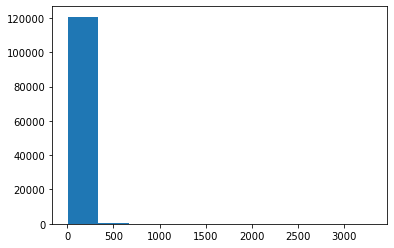

In [40]:
plt.hist(df2['price'])
plt.show()

In [41]:
df2['price'].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

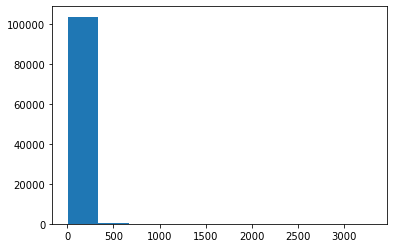

In [42]:
prices_of_top_varieties = df2['price'][df2['variety'].isin(top_varieties.index)].dropna()
plt.hist(prices_of_top_varieties)
plt.show()

In [43]:
prices_of_top_varieties.describe()

count    104070.000000
mean         36.704122
std          42.957282
min           4.000000
25%          18.000000
50%          27.000000
75%          45.000000
max        3300.000000
Name: price, dtype: float64

### We see that there is no significant difference between the distribution of ````prices````  in the actual dataset and in the top varieties.

## By Points

In [44]:
df2['points'].unique().shape

(21,)

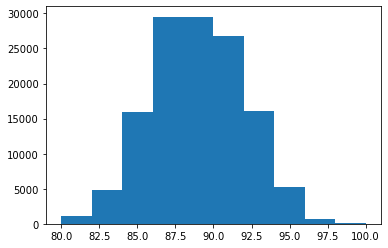

In [45]:
plt.hist(df2['points'])
plt.show()

In [46]:
df2['points'].describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

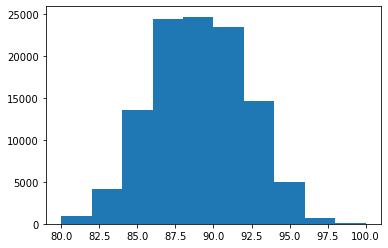

In [47]:
points_of_top_varieties = df2['points'][df2['variety'].isin(top_varieties.index)].dropna()
plt.hist(points_of_top_varieties)
plt.show()

In [48]:
points_of_top_varieties.describe()

count    111797.000000
mean         88.532179
std           3.080003
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

### We see that there is no significant difference between the distribution of ````points````  in the actual dataset and in the top varieties.

## By Designation

In [49]:
len(df2['designation'].dropna().unique())

37979

In [50]:
by_designation = df2['designation'].dropna().value_counts()

# NOTE: WE AVIOD PLOTTING THE CHART BEACUSE IT WILL BE TOO MESSY DUE TO THE LARGE NUMBER OF UNIQUE DESIGNATION
# WE WILL USE JUST THE SUMMARY STATISTICS AS OUR CLUE


#fig = plt.figure(figsize=(18, 4))
#plt.bar(by_designation.index, by_designation.values)
#plt.xticks(rotation=90)
#plt.show()

In [51]:
by_designation

Reserve                                                           2009
Estate                                                            1322
Reserva                                                           1259
Riserva                                                            698
Estate Grown                                                       621
                                                                  ... 
Tilting at Windmills                                                 1
Single Vineyard Selection Sebes Alba Transylvania                    1
High Elevation Collection Sustainably Farmed Vineyards               1
Duque de Medina Reserva Old Vine                                     1
Almancenista José Luis González Obregón Amontillado del Puerto       1
Name: designation, Length: 37979, dtype: int64

In [52]:
by_designation.describe()

count    37979.000000
mean         2.435714
std         16.303071
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       2009.000000
Name: designation, dtype: float64

In [53]:
designation_with_top_varieties = df2['designation'].dropna()[df2['variety'].isin(top_varieties.index)]
print(designation_with_top_varieties.unique().shape[0])
#designation_with_top_varieties

32506


In [54]:
len(set(df2['designation'].dropna()) - set(designation_with_top_varieties.unique()))

5473

In [55]:
designation_with_top_varieties.value_counts()

Reserve                                1863
Estate                                 1205
Reserva                                1155
Riserva                                 628
Estate Grown                            579
                                       ... 
Block 216 Clone 5 Pommard                 1
McGinley Vineyard Homage Collection       1
El Anejón                                 1
Château de Saint-Amour                    1
Château Terrebonne Coeur de Cuvée         1
Name: designation, Length: 32506, dtype: int64

In [56]:
designation_with_top_varieties.value_counts().describe()

count    32506.000000
mean         2.453301
std         16.187132
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1863.000000
Name: designation, dtype: float64

### We see that there is no significant difference between the distribution of ````designation````  in the actual dataset and in the top varieties.

## By Province

In [57]:
len(df2['province'].dropna().unique())

425

In [58]:
by_province = df2['province'].dropna().value_counts()

# NOTE: WE AVIOD PLOTTING THE CHART BEACUSE IT WILL BE TOO MESSY DUE TO THE LARGE NUMBER OF UNIQUE PROVINCE
# WE WILL USE JUST THE SUMMARY STATISTICS AS OUR CLUE


#fig = plt.figure(figsize=(18, 4))
#plt.bar(by_province.index, by_province.values)
#plt.xticks(rotation=90)
#plt.show()

In [59]:
by_province

California                   36247
Washington                    8639
Bordeaux                      5941
Tuscany                       5897
Oregon                        5373
                             ...  
Hawaii                           1
Alenteo                          1
Vlootenburg                      1
Mavrodaphne de Cephalonie        1
Serra do Sudeste                 1
Name: province, Length: 425, dtype: int64

In [60]:
by_province.describe()

count      425.000000
mean       305.665882
std       1920.003074
min          1.000000
25%          3.000000
50%         12.000000
75%         53.000000
max      36247.000000
Name: province, dtype: float64

In [61]:
province_with_top_varieties = df2['province'].dropna()[df2['variety'].isin(top_varieties.index)]
print(province_with_top_varieties.unique().shape[0])

376


In [62]:
len(set(df2['province'].dropna()) - set(province_with_top_varieties.unique()))

49

In [63]:
province_with_top_varieties.value_counts().describe()

count      376.000000
mean       297.226064
std       1898.970291
min          1.000000
25%          3.000000
50%          9.000000
75%         56.000000
max      33940.000000
Name: province, dtype: float64

### We see that there is no significant difference between the distribution of ````province````  in the actual dataset and in the top varieties.

## By Region 1

In [64]:
len(df2['region_1'].dropna().unique())

1229

In [65]:
by_region1 = df2['region_1'].dropna().value_counts()

# NOTE: WE AVIOD PLOTTING THE CHART BEACUSE IT WILL BE TOO MESSY DUE TO THE LARGE NUMBER OF UNIQUE REGION1
# WE WILL USE JUST THE SUMMARY STATISTICS AS OUR CLUE


#fig = plt.figure(figsize=(18, 4))
#plt.bar(by_region1.index, by_region1.values)
#plt.xticks(rotation=90)
#plt.show()

In [66]:
by_region1.describe()

count    1229.000000
mean       88.465419
std       298.154276
min         1.000000
25%         3.000000
50%        11.000000
75%        51.000000
max      4480.000000
Name: region_1, dtype: float64

In [67]:
region1_with_top_varieties = df2['region_1'].dropna()[df2['variety'].isin(top_varieties.index)]
print(region1_with_top_varieties.unique().shape[0])

1095


In [68]:
len(set(df2['region_1'].dropna()) - set(region1_with_top_varieties.unique()))

134

In [69]:
region1_with_top_varieties.value_counts().describe()

count    1095.000000
mean       85.950685
std       293.772250
min         1.000000
25%         3.000000
50%        10.000000
75%        46.500000
max      4273.000000
Name: region_1, dtype: float64

### We see that there is no significant difference between the distribution of ````region1````  in the actual dataset and in the top varieties.

## By Region 2

In [70]:
len(df2['region_2'].dropna().unique())

17

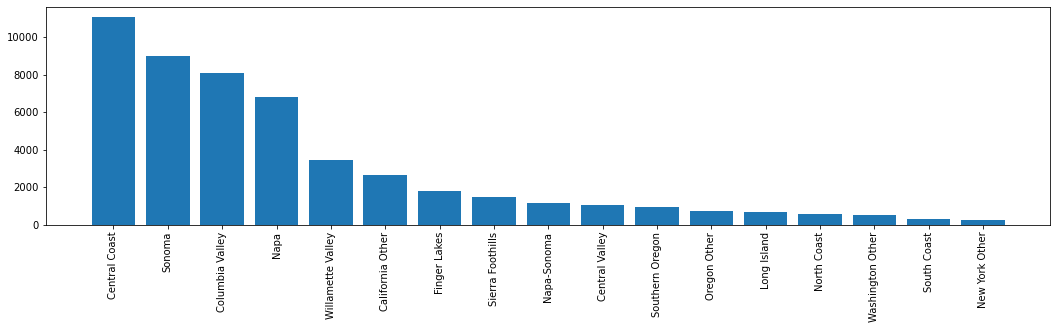

In [71]:
by_region2 = df2['region_2'].dropna().value_counts()
fig = plt.figure(figsize=(18, 4))
plt.bar(by_region2.index, by_region2.values)
plt.xticks(rotation=90)
plt.show()

In [72]:
by_region2.describe()

count       17.000000
mean      2971.235294
std       3492.237813
min        231.000000
25%        680.000000
50%       1169.000000
75%       3423.000000
max      11065.000000
Name: region_2, dtype: float64

In [73]:
region2_with_top_varieties = df2['region_2'].dropna()[df2['variety'].isin(top_varieties.index)]
print(region2_with_top_varieties.unique().shape[0])

17


In [74]:
len(set(df2['region_2'].dropna()) - set(region2_with_top_varieties.unique()))

0

In [75]:
region2_with_top_varieties.value_counts().describe()

count       17.000000
mean      2775.235294
std       3276.633496
min        195.000000
25%        631.000000
50%       1134.000000
75%       3286.000000
max      10093.000000
Name: region_2, dtype: float64

### We see that all bottom 667 varieties seem not to have any value for ````region2```` .

## By Winery

In [76]:
len(df2['winery'].dropna().unique())

16757

In [77]:
by_winery = df2['winery'].dropna().value_counts()

# NOTE: WE AVIOD PLOTTING THE CHART BEACUSE IT WILL BE TOO MESSY DUE TO THE LARGE NUMBER OF UNIQUE WINERY
# WE WILL USE JUST THE SUMMARY STATISTICS AS OUR CLUE


#fig = plt.figure(figsize=(18, 4))
#plt.bar(by_region1.index, by_region1.values)
#plt.xticks(rotation=90)
#plt.show()

In [78]:
by_winery.describe()

count    16757.000000
mean         7.756221
std         12.762010
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        222.000000
Name: winery, dtype: float64

In [79]:
winery_of_top_varieties = df2['winery'].dropna()[df2['variety'].isin(top_varieties.index)]
print(winery_of_top_varieties.unique().shape[0])


15354


In [80]:
len(set(df2['winery'].dropna()) - set(winery_of_top_varieties.unique()))

1403

In [81]:
winery_of_top_varieties.value_counts().describe()

count    15354.000000
mean         7.281295
std         12.094350
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        217.000000
Name: winery, dtype: float64

### We see that there is no significant difference between the distribution of ````winery````  in the actual dataset and in the top varieties.

## By Vintage

### ````vintage```` is the year in which a set of wine grapes were harvested. We will obtain it from the ````title```` column by removing all of ````country````, ````designation````, ````province````, ````region_1````, ````region_2````, and ````winery```` from ````title````

In [82]:
title_list = ['country', 'designation', 'province', 'region_1', 'region_2', 'winery']

In [83]:
def get_vintage(row):
    title = row['title']
    for bracket in ['(', ')']:
        title = ''.join(title.split(bracket))
    
    not_vintage = row['not_vintage']
    vintage = set(title.split()) - set(not_vintage.split())
    return ' '.join(vintage)

### we will name the combination of ````country````, ````designation````, ````province````, ````region_1````, ````region_2````, and ````winery```` as ````not_vintage````

In [84]:
df2['not_vintage'] = df2[title_list].apply(lambda x: ' '.join([str(i) for i in x if pd.notna(i)]), axis=1)
df2['vintage'] = df2.apply(get_vintage, axis=1)
df2.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,not_vintage,vintage
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Italy Vulkà Bianco Sicily & Sardinia Etna Nicosia,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Portugal Avidagos Douro Quinta dos Avidagos,Red 2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,US Oregon Willamette Valley Willamette Valley ...,Pinot Gris 2013


In [85]:
# making a Series of lists of numeric characters in vintage as our new vintage
vintage = df2['vintage'].apply(lambda x: [int(i) for i in x.split() if i.isnumeric()])
print(vintage.shape[0])
vintage.head()

129971


0    [2013]
1    [2011]
2    [2013]
3    [2013]
4    [2012]
Name: vintage, dtype: object

In [86]:
len_vintage = vintage.apply(lambda x: len(x)) # confirms that no vintage list has more than 1 value

In [87]:
print((len_vintage > 1).sum())
print((len_vintage == 0).sum())
print((len_vintage == 1).sum())

0
4634
125337


### confirmed! Where ````len_vintage```` == 0 means that the vintage is missing for that observation

In [88]:
 vintage.shape[0] - len_vintage.sum()

4634

In [89]:
df2[len_vintage == 0].head(3) # checking the dataframe for where len_vintage == 0 

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,not_vintage,vintage
63,63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,France Brut Rosé Champagne Champagne Roland Ch...,NV
69,69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,France Brut Rosé Champagne Champagne Collet,NV
237,237,Italy,The wine boasts a beautiful appearance thanks ...,NaN,85,18.0,Central Italy,San Marino,NaN,NaN,NaN,Consorzio Vini Tipici di San Marino NV Moscato...,Moscato,Consorzio Vini Tipici di San Marino,Italy Central Italy San Marino Consorzio Vini ...,Moscato NV


In [90]:
# creating a function to fill where there is no vintage with Nan value
def get_year(row):
    if len(row) == 0:
        return np.nan
    return row[0]

In [91]:
df2['vintage'] = vintage.apply(get_year) # checking the dataframe for the new vintage column
df2.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,not_vintage,vintage
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Italy Vulkà Bianco Sicily & Sardinia Etna Nicosia,2013.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Portugal Avidagos Douro Quinta dos Avidagos,2011.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,US Oregon Willamette Valley Willamette Valley ...,2013.0


In [92]:
df2['vintage'].unique().shape[0]

57

In [93]:
df2['vintage'].isnull().sum()

4634

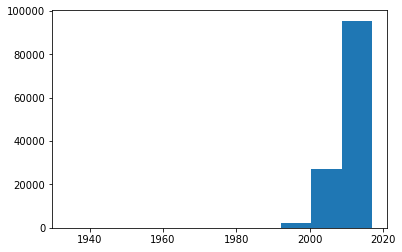

In [94]:
plt.hist(df2['vintage'])
plt.show()

In [95]:
df2['vintage'].describe()

count    125337.000000
mean       2010.684762
std           3.634751
min        1934.000000
25%        2009.000000
50%        2011.000000
75%        2013.000000
max        2017.000000
Name: vintage, dtype: float64

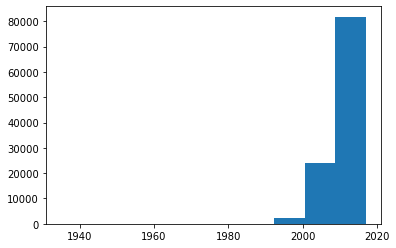

In [96]:
vintage_of_top_varieties = df2['vintage'][df2['variety'].isin(top_varieties.index)].dropna()
plt.hist(vintage_of_top_varieties)
plt.show()

In [97]:
vintage_of_top_varieties.describe()

count    107923.000000
mean       2010.627716
std           3.649707
min        1935.000000
25%        2009.000000
50%        2011.000000
75%        2013.000000
max        2017.000000
Name: vintage, dtype: float64

### We see that there is no significant difference between the distribution of ````vintage````  in the actual dataset and in the top varieties.

## Getting top 40 varieties df

In [98]:
top_40_df = df2[df2['variety'].isin(top_varieties.index)]
top_40_df = top_40_df.drop('Unnamed: 0', axis=1)
print(top_40_df.shape)
print(len(top_40_df['variety'].unique()))
top_40_df.head(3)

(111797, 15)
40


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,not_vintage,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Italy Vulkà Bianco Sicily & Sardinia Etna Nicosia,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Portugal Avidagos Douro Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,US Oregon Willamette Valley Willamette Valley ...,2013.0


In [99]:
# saving top_varieties_count and top_40_df as csv file for cleaning and modeling
top_varieties_count = top_varieties.to_frame()
top_40_df.to_csv('top_40_varieties.csv', index=False)
top_varieties_count.to_csv('top_varieties_count.csv')